In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#увеличим дефолтный размер графиков (ширина, высота)
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

# Данные для анализа

Для анализа берем набор данных о влиянии использования электронных гаджетов на академическую успеваемость в университете с [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).

In [ ]:
df=pd.read_csv('The Impact of Electronic Gadget Uses with Academic Performance among University Students (Responses) - Form Responses 1.csv')
df.head()

,Timestamp,Gender,Your study year,Which department,How many electronic devices do you use?,What is your recent latest CGPA ?,Is there an increase in your CGPA?,Average hour you spent using electronic devices for academic purposes in a day (hours).,What is the purpose of buying the device?
0,7/19/2022 12:26:34,Female,4,Information Technology,2,3.00-3.49,Increase,4-6,"Studies, Entertainment, Phone call"
1,7/21/2022 2:19:26,Male,Post Graduate,Business Management,4,3.00-3.49,decrease,1-3,"Studies, Entertainment, Online class, games, M..."
2,7/21/2022 18:55:02,Male,3,Information Technology,3,3.50 - 3.99,Increase,4-6,"Studies, Entertainment, Online class, Phone call"
3,8/22/2022 10:01:30,Female,3,Engineering,3,2.50-2.99,decrease,1-3,"Studies, Entertainment, Online class, games, M..."
4,8/22/2022 10:02:05,Male,2,Architecture & Built Environment,2,3.00-3.49,Increase,4-6,"Studies, Entertainment"


In [ ]:
# смотрим "объем" датафрейма (строки, столбцы)
print(df.shape)

(30, 9)


In [ ]:
#для удобства переименуем названия столбцов
df.columns = ['Time', 'Gender', 'Experience',
                  'Faculty', 'Quantity_gadgets',
                  'Mean_ratings', 'Increase_ratings',
                  'Mean_hour_for_academic', 'Purpose']
df.head()

,Time,Gender,Experience,Faculty,Quantity_gadgets,Mean_ratings,Increase_ratings,Mean_hour_for_academic,Purpose
0,7/19/2022 12:26:34,Female,4,Information Technology,2,3.00-3.49,Increase,4-6,"Studies, Entertainment, Phone call"
1,7/21/2022 2:19:26,Male,Post Graduate,Business Management,4,3.00-3.49,decrease,1-3,"Studies, Entertainment, Online class, games, M..."
2,7/21/2022 18:55:02,Male,3,Information Technology,3,3.50 - 3.99,Increase,4-6,"Studies, Entertainment, Online class, Phone call"
3,8/22/2022 10:01:30,Female,3,Engineering,3,2.50-2.99,decrease,1-3,"Studies, Entertainment, Online class, games, M..."
4,8/22/2022 10:02:05,Male,2,Architecture & Built Environment,2,3.00-3.49,Increase,4-6,"Studies, Entertainment"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Time                    30 non-null     object
 1   Gender                  30 non-null     object
 2   Experience              30 non-null     object
 3   Faculty                 30 non-null     object
 4   Quantity_gadgets        30 non-null     int64 
 5   Mean_ratings            30 non-null     object
 6   Increase_ratings        30 non-null     object
 7   Mean_hour_for_academic  30 non-null     object
 8   Purpose                 30 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.2+ KB


In [ ]:
# пропусков нет
# столбец "средний рейтинг": возьмем среднее значение и переведем во float
# столбец "среднее время использования": возьмем среднее значение и переведем во float
# удаляем лишние столбцы (в т.ч. столбец Time как несущественный для анализа)
df['Use_hour_for_academic'] = (df['Mean_hour_for_academic'].str.split('-', expand = True)[0].astype(int) + df['Mean_hour_for_academic'].str.split('-',expand = True)[1].astype(int))/2
df['CGPA'] = (df['Mean_ratings'].str.split('-', expand = True)[0].astype(float) + df['Mean_ratings'].str.split('-',expand = True)[1].astype(float))/2
df=df.drop(['Time', 'Mean_ratings', 'Mean_hour_for_academic'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 30 non-null     object 
 1   Experience             30 non-null     object 
 2   Faculty                30 non-null     object 
 3   Quantity_gadgets       30 non-null     int64  
 4   Increase_ratings       30 non-null     object 
 5   Purpose                30 non-null     object 
 6   Use_hour_for_academic  30 non-null     float64
 7   CGPA                   30 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 2.0+ KB


In [ ]:
df.head()

,Gender,Experience,Faculty,Quantity_gadgets,Increase_ratings,Purpose,Use_hour_for_academic,CGPA
0,Female,4,Information Technology,2,Increase,"Studies, Entertainment, Phone call",5.0,3.245
1,Male,Post Graduate,Business Management,4,decrease,"Studies, Entertainment, Online class, games, M...",2.0,3.245
2,Male,3,Information Technology,3,Increase,"Studies, Entertainment, Online class, Phone call",5.0,3.745
3,Female,3,Engineering,3,decrease,"Studies, Entertainment, Online class, games, M...",2.0,2.745
4,Male,2,Architecture & Built Environment,2,Increase,"Studies, Entertainment",5.0,3.245


# Визуализации

## Area chart

In [ ]:
# оценим, как время использования гаджетов влияет на рейтинг обучающихся
dynamics_by_CGPA = df[['Use_hour_for_academic']].groupby(df['CGPA'])


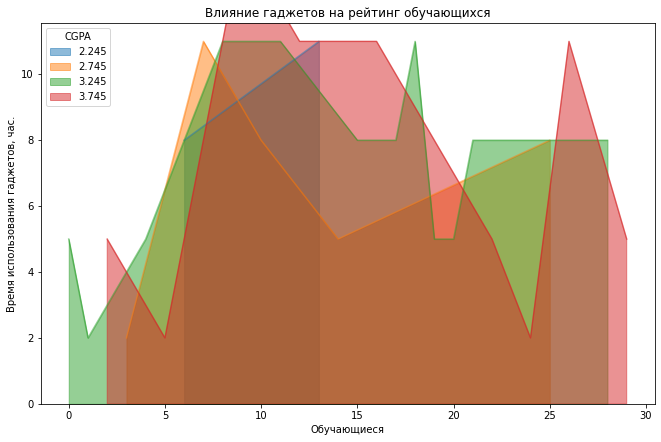

In [ ]:
dynamics_by_CGPA['Use_hour_for_academic'].plot(kind='area',
                                               stacked=False,
                                               title='Влияние гаджетов на рейтинг обучающихся',
                                                xlabel='Обучающиеся',
                                                ylabel='Время использования гаджетов, час.'),
plt.legend(loc='best', title = 'CGPA');

На основе визуализации можно выдвинуть следующую гипотезу:
**НЕТ ЗАВИСИМОСТИ МЕЖДУ CGPA СТУДЕНТА И ДЛИТЕЛЬНОСТЬЮ ИСПОЛЬЗОВАНИЯ ГАДЖЕТОВ **

## Столбчатая диаграмма

In [ ]:
# время использования в зависимости от количества гаджетов
gadgets_by_hour = df[['Use_hour_for_academic', 'Quantity_gadgets']].groupby('Quantity_gadgets').mean().round(1).sort_values('Use_hour_for_academic', ascending=False).head()
gadgets_by_hour

,Use_hour_for_academic
Quantity_gadgets,
3,8.0
2,7.8
4,5.6
1,5.0


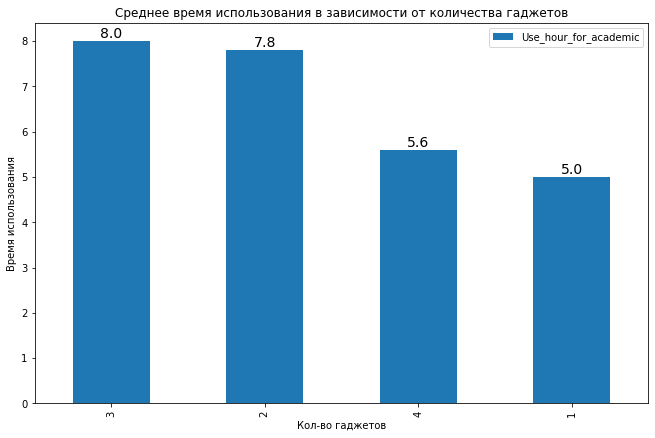

In [ ]:
gadgets_by_hour.plot(kind='bar',
                        title='Среднее время использования в зависимости от количества гаджетов',
                        xlabel='Кол-во гаджетов',
                        ylabel='Время использования');
for i, val in enumerate(gadgets_by_hour.values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

На основе визуализации можно выдвинуть следующую гипотезу:
**Чаще всего гаджеты используют студенты, у которых 2-3 гаджета **

## Круговая диаграмма

In [ ]:
# посмотрим с какой целью чаще всего используют гаджеты студенты
purpose_freq = df['Purpose'].str.split(',', expand = True).stack().value_counts()
purpose_freq

Studies           29
 Entertainment    25
 Phone call       23
 Online class     20
 Movies           11
 games             9
Online class       1
dtype: int64

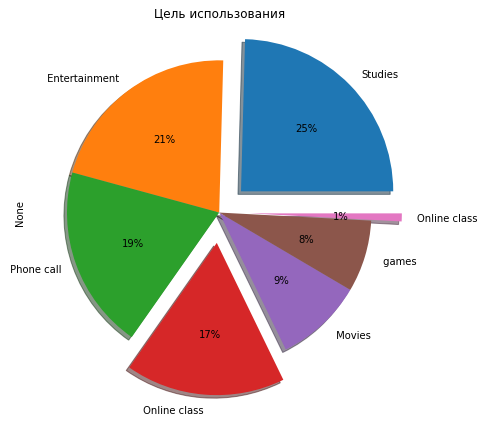

In [ ]:
purpose_freq.plot(kind='pie', title='Цель использования', autopct='%1.0f%%', shadow=True, explode = [0.2, 0, 0, 0.2, 0, 0, 0.2]);

На основе визуализации можно выдвинуть следующую гипотезу:
**Большинство студентов используют гаджеты для обучения, на втором месте развлечения **

## Boxplot

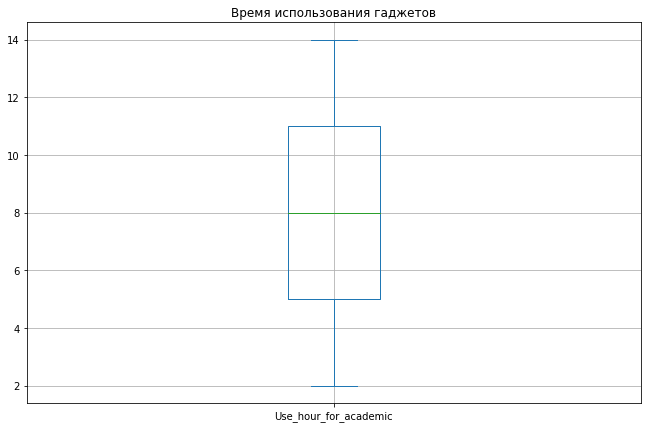

In [ ]:
# можно проверить выбросы
df['Use_hour_for_academic'].plot(kind='box',
                      title='Время использования гаджетов', grid=True);

На основе визуализации - выбросов нет

## Точечная диаграмма

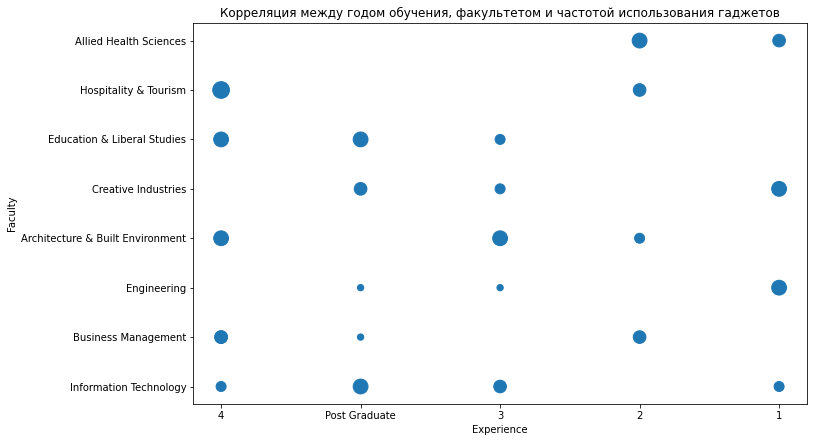

In [ ]:
# посмотрим на взаимосвязь факультета, года обучения и времени использования гаджетов
df.plot(kind='scatter',
        x='Experience',
        y='Faculty',
        s=df['Use_hour_for_academic']*20,
        title='Корреляция между годом обучения, факультетом и частотой использования гаджетов'
       );

На основе визуализации можно выдвинуть следующую гипотезу:
**По частоте использования гаджетов на первом месте студенты 4 года обучения, затем второй год обучения. Из факультетов на первом месте "информационные технологии", на последнем "инженеры" **

## Seaborn

In [ ]:
import seaborn as sns

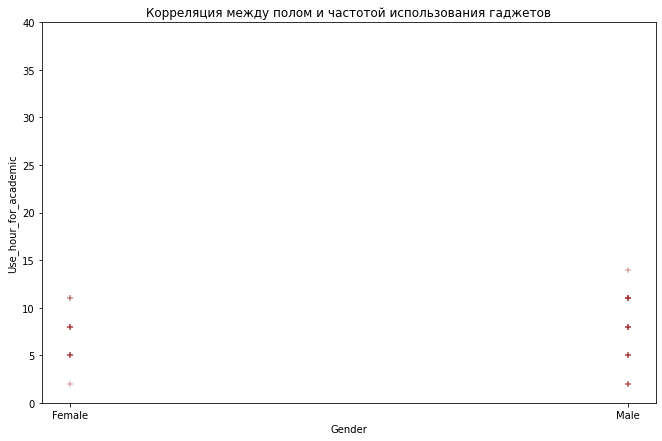

In [ ]:
# посмотрим зависимость пола и времени использования гаджетов
sns.scatterplot(data=df, x='Gender', y='Use_hour_for_academic', color='brown', marker='+')
plt.title('Корреляция между полом и частотой использования гаджетов')
plt.ylim(0, 40);

На основе визуализации можно выдвинуть следующую гипотезу:
**Женщины реже мужчин используют гаджеты **

In [ ]:
# pair plot (scatter plot matrix) - смотрим на одной картинке, как связаны между собой различные признаки в наборе данных

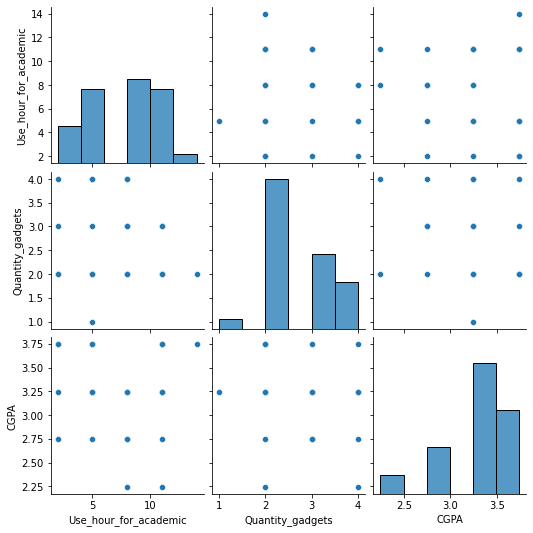

In [ ]:
sns.pairplot(df[['Use_hour_for_academic', 'Quantity_gadgets', 'CGPA']]);

По диагонали матрицы графиков расположены столбчатые диаграммы по признакам. Остальные  графики — корреляция для соответствующих пар признаков.
Взаимосвязь "Use_hour_for_academic-CGPA" смотрели выше в визуализации Area chart, по данной визуализации остаётся такая же гипотеза "нет зависимости между рейтигом и частотой использования гаджетов" (в area chart было более наглядно).
Взаимосвязь "Use_hour_for_academic-Quantity_gadgets" смотрели выше в столбчатой диаграмме, по данной визуализации остаётся такая же гипотеза "Чаще всего гаджеты используют студенты, у которых 2-3 гаджета" (в столбатой было более наглядно).
По визуализации для "Quantity_gadgets-CGPA" можно выдвинуть следующую гипотезу: "Нет взаимосвязи между этими признаками".

**Посмотрим влияет ли использование гаджетов на прогресс обучающихся** при помощи `boxplot`.

In [ ]:
increase_hour = df['Increase_ratings'].value_counts().index.values
increase_hour

array(['Increase', 'None', 'decrease'], dtype=object)

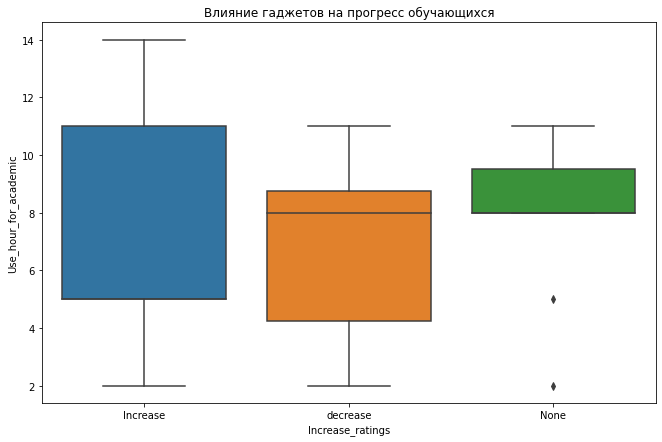

In [ ]:
sns.boxplot(x="Increase_ratings", y="Use_hour_for_academic",
            data=df[df['Increase_ratings'].isin(increase_hour)])
plt.title('Влияние гаджетов на прогресс обучающихся');

Визуализируем с помощью `Heat map` **часы использования по полу и годам обучения**.

In [ ]:
hour_gender_experience = df.pivot_table(
                        index='Experience',
                        columns='Gender',
                        values='Use_hour_for_academic',
                        aggfunc=sum).fillna(0)

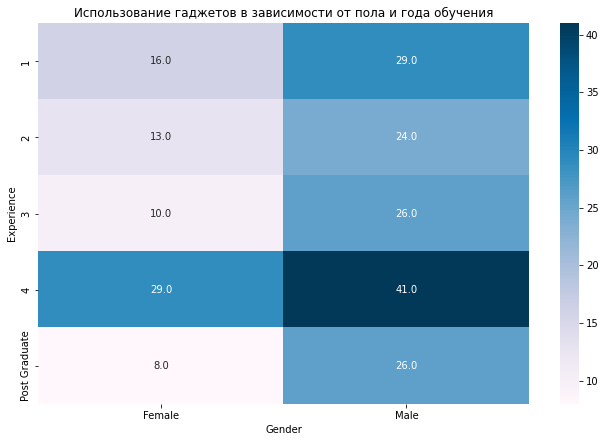

In [ ]:
sns.heatmap(hour_gender_experience, cmap='PuBu', annot=True, fmt='.1f')
plt.title('Использование гаджетов в зависимости от пола и года обучения');

In [ ]:
# На основе полученной визуализации можно выдвинуть следующую гипотезу: "Больше всего гаджеты используют студенты 4-го курса, как мужчины, так и женщины"